# Importing Libraries & Dataframe

In [58]:
# Importing library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
from datetime import datetime
import warnings
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
warnings.filterwarnings("ignore") 

plt.style.use('fivethirtyeight')

In [4]:
#Creating a path and importing my Chocolate dataframe
path = r'/users/divyaneopaney/Downloads/Chocolate Bar Analysis'
path

'/users/divyaneopaney/Downloads/Chocolate Bar Analysis'

In [6]:
df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'Cleaned_ChocolateBarRating.csv'))

# Data Cleaning

In [9]:
# 1. Standardizing all column names by replacing \xa0 with a regular space and removing any leading or trailing whitespace.
df.columns = [col.replace('\xa0', ' ').strip() for col in df.columns]
# 2. Now renamaing the company/cleaned header
df.rename(columns={'Company  (Maker-if known)': 'Company'}, inplace=True)
df.columns.tolist()

['Company',
 'BarName',
 'REF',
 'ReviewDate',
 'CocoaPercent',
 'Location',
 'Rating',
 'BeanType',
 'BroadOrigin']

In [11]:
#Renaming the column Broad Origin
df.rename(columns={'BroadOrigin': 'Country'}, inplace=True)
print(df.columns)

Index(['Company', 'BarName', 'REF', 'ReviewDate', 'CocoaPercent', 'Location',
       'Rating', 'BeanType', 'Country'],
      dtype='object')


In [13]:
#Cleaning extra spaces
df.columns = df.columns.str.strip().str.replace(' ', ' ').str.replace(' ', '')

In [15]:
df.head()

,Company,BarName,REF,ReviewDate,CocoaPercent,Location,Rating,BeanType,Country
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,Unknown,Sao Tome
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,Unknown,Togo
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,Unknown,Togo
3,A. Morin,Akata,1680,2015,70.0,France,3.50,Unknown,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,Unknown,Peru


# Creating a Subset

In [17]:
# Subsetting the relevant columns for time series
ts_df = df[["ReviewDate", "Rating"]]

In [19]:
# Grouping by year to create a time series of average ratings per year
ts_avg = ts_df.groupby("ReviewDate").mean().reset_index()

In [24]:
# Naming the data set, ts_avg or time series average.
ts_avg.rename(columns={"ReviewDate": "Year", "Rating": "AvgRating"}, inplace=True)

In [26]:
# Seting the Year as datetime index
ts_avg["Year"] = pd.to_datetime(ts_avg["Year"], format="%Y")
ts_avg.set_index("Year", inplace=True)

ts_avg.head()

,AvgRating
Year,
2006-01-01,3.125000
2007-01-01,3.162338
2008-01-01,2.994624
2009-01-01,3.073171
2010-01-01,3.148649


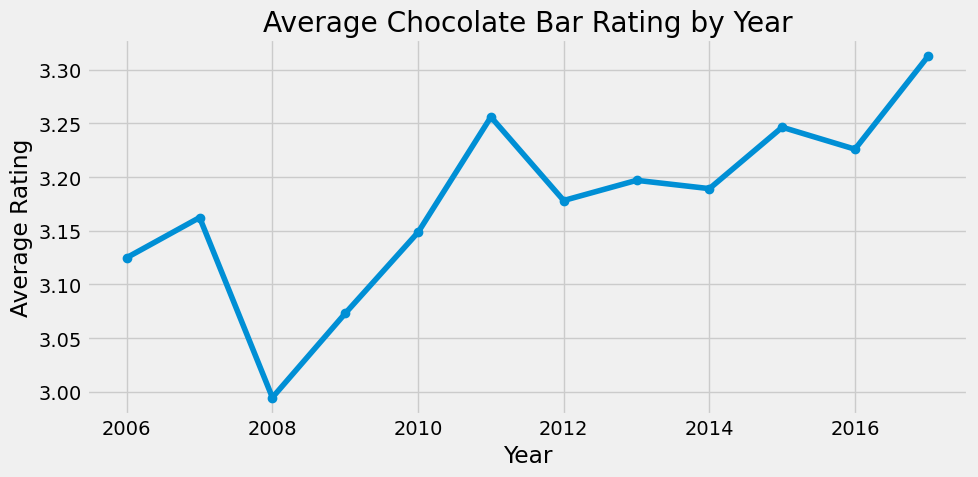

In [70]:
# Ploting the time series
plt.figure(figsize=(10, 5))
plt.plot(ts_avg, marker='o')
plt.title("Average Chocolate Bar Rating by Year")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.grid(True)
plt.tight_layout()
plt.show()

In [36]:
# Decomposing the time series (yearly frequency)
decomposition = seasonal_decompose(ts_avg, model='additive', period=1)

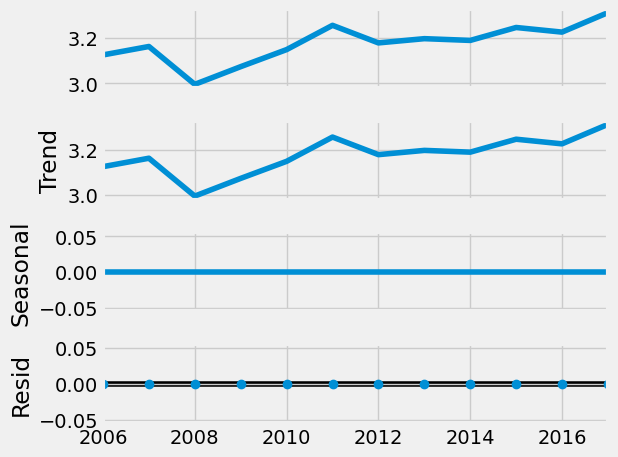

In [76]:
# Ploting the decomposition
decomposition.plot() 
plt.tight_layout()
plt.show()

# Test for Stationary

In [44]:
#Conducting a Dickey-Fuller test to check for stationarity
adf_result = adfuller(ts_avg['AvgRating'])

In [51]:
# Printing the results
print("Dickey-Fuller Test Results:")
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
for key, value in adf_result[4].items():
    print(f"Critical Value ({key}): {value}")

Dickey-Fuller Test Results:
ADF Statistic: -1.2377660536004385
p-value: 0.6571424709520043
Critical Value (1%): -4.6651863281249994
Critical Value (5%): -3.3671868750000002
Critical Value (10%): -2.802960625


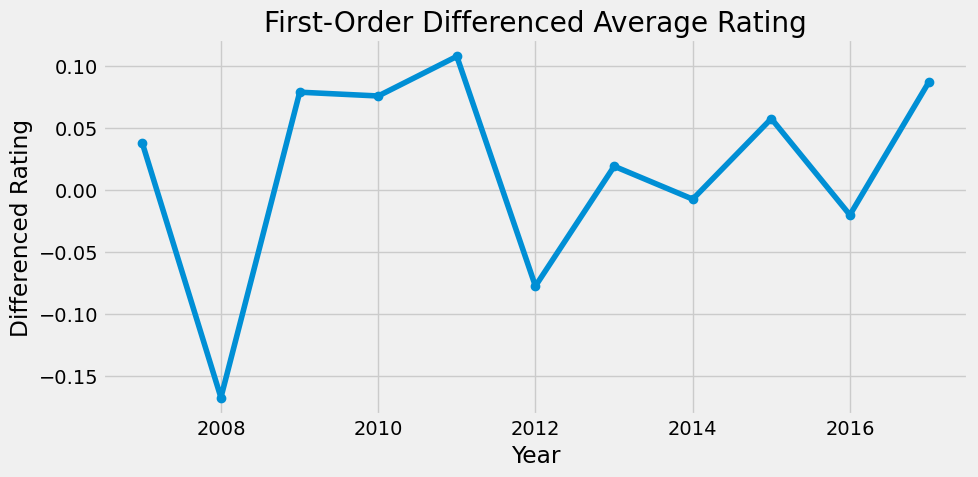

In [78]:
# First-order differencing
ts_diff1 = ts_avg.diff().dropna()

# Plot first-differenced data
plt.figure(figsize=(10, 5))
plt.plot(ts_diff1, marker='o')
plt.title("First-Order Differenced Average Rating")
plt.xlabel("Year")
plt.ylabel("Differenced Rating")
plt.grid(True)
plt.tight_layout()
plt.show()

In [88]:
# Runing the ADF test
adf_result_diff1 = adfuller(ts_diff1["AvgRating"])

# Printing the results
print("ADF Statistic:", adf_result_diff1[0])
print("p-value:", adf_result_diff1[1])
print("Critical Values:")
for key, value in adf_result_diff1[4].items():
    print(f"   {key}: {value}")

ADF Statistic: -5.667874325830316
p-value: 9.063532737869093e-07
Critical Values:
   1%: -4.6651863281249994
   5%: -3.3671868750000002
   10%: -2.802960625


# Auto Correlation Check

<Figure size 1200x500 with 0 Axes>

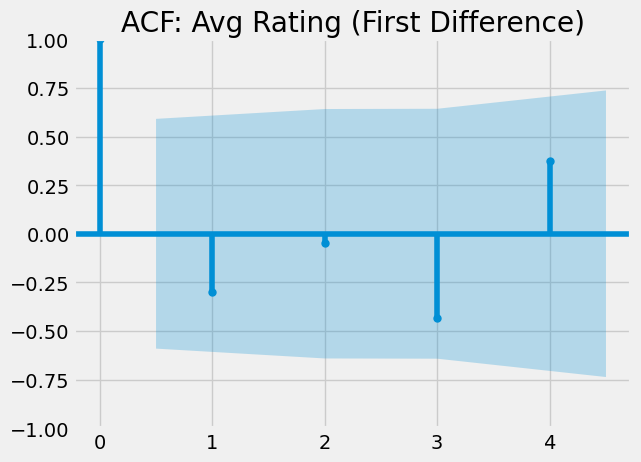

In [66]:
# Use differenced data
plt.figure(figsize=(12, 5))
plot_acf(ts_diff1['AvgRating'], lags=4)
plt.title("ACF: Avg Rating (First Difference)")
plt.show()

<Figure size 1200x500 with 0 Axes>

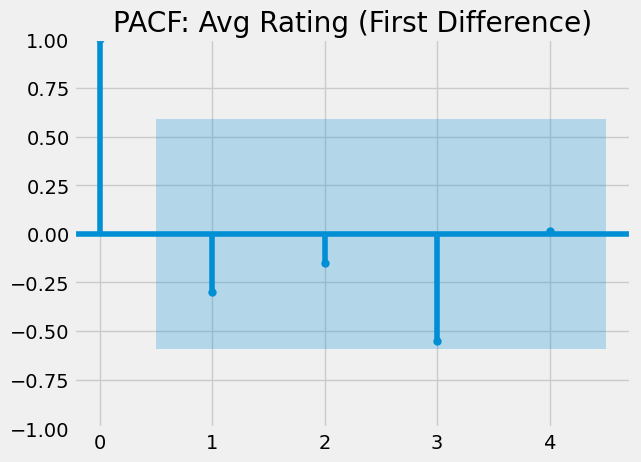

In [64]:
plt.figure(figsize=(12, 5))
plot_pacf(ts_diff1['AvgRating'], lags=4)
plt.title("PACF: Avg Rating (First Difference)")
plt.show()